<a href="https://colab.research.google.com/github/ParsaMohammadpour/heterogeneity-of-complex-networks/blob/main/index_to_quantifying_heterogeneity_of_complex_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### installing networkx

In [1]:
!pip install networkx

### imports

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import scipy.stats as st

### H

In [3]:
def calculate_H(graph):
  degrees = list(sorted([val for (node, val) in graph.degree()]))
  H = 0
  deg_mean = np.mean(degrees)
  for i in degrees:
    for j in degrees:
      H += abs(i - j)
  H /= 2*len(graph)*len(graph)*deg_mean
  return H

In [4]:
def calculate_H_for_distribution(data):
  H = 0
  data_mean = np.mean(data)
  for i in data:
    for j in data:
      H += abs(i - j)
  H /= 2*len(data)*len(data)*data_mean
  return H

### $$S_b$$

In [5]:
def calculate_Sb(graph):
  degrees = list(sorted([val for (node, val) in graph.degree()]))
  deg_sum = np.sum(degrees)
  ws = [i/deg_sum for i in degrees]
  cum_ws = np.cumsum(ws)
  Sb = 0.5 * (cum_ws[0])
  for i in range(1, len(cum_ws)):
    Sb += 0.5 * (cum_ws[i] + cum_ws[i-1])
  return Sb / len(graph)

def calculate_H_with_Sb(graph):
  return 1 - 2*calculate_Sb(graph)

### graph holder

In [6]:
class Graph_comparator:
  def __init__(self, graph):
    self.graph = graph
    self.degrees = list(sorted([val for (node, val) in graph.degree()]))
    self.deg_sum = np.sum(self.degrees)
    self.deg_mean = np.mean(self.degrees)
    self.ws = [i/self.deg_sum for i in self.degrees]
    self.cum_ws = np.cumsum(self.ws)

  def calculate_Sb(self):
    Sb = 0.5 * (self.cum_ws[0])
    for i in range(1, len(self.cum_ws)):
      Sb += 0.5 * (self.cum_ws[i] + self.cum_ws[i-1])
    return Sb / len(self.graph)

  def calculate_H_with_Sb(self):
    return 1 - 2*calculate_Sb(self.graph)

  def calculate_H(self):
    H = 0
    for i in self.degrees:
      for j in self.degrees:
        H += abs(i - j)
    H /= 2*len(self.graph)*len(self.graph)*self.deg_mean
    return H

  def plot_degrees(self):
    x_len = len(self.cum_ws) + 1
    x = np.array(list(range(x_len))) * 100 / x_len
    graph_h = self.cum_ws*100/self.cum_ws[-1]
    plt.plot(x, [0, *graph_h], '--', label=' Heterogeneity curve')
    complete_heterogeneity = np.cumsum([len(self.graph)-1 for i in range(len(self.graph))])
    complete_heterogeneity = complete_heterogeneity * 100 / complete_heterogeneity[-1]
    plt.plot(x, [0, *complete_heterogeneity], ':', label='Line of complete Heterogeneity')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100.))
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(100.))
    plt.fill_between(x, [0, *complete_heterogeneity], [0, *graph_h], facecolor='lightgreen', label='A')
    plt.fill_between(x, [0, *graph_h], 0, facecolor='lightgray', label='B')
    plt.xlabel('% of nodes')
    plt.ylabel('% of degrees')
    plt.title('Heterogeneity')
    plt.legend(loc='best')
    plt.show()

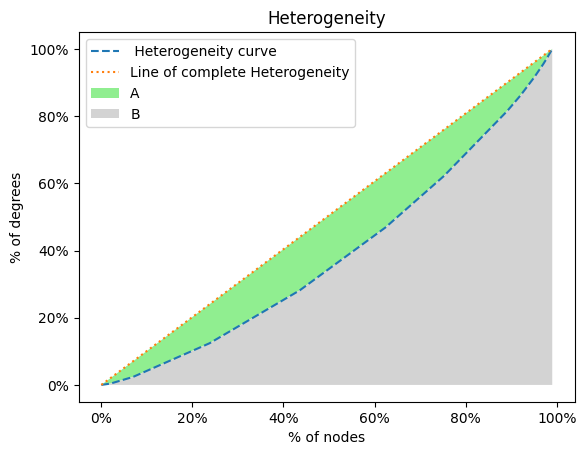

In [7]:
g = nx.erdos_renyi_graph(100, 0.05)
gc = Graph_comparator(g)
gc.plot_degrees()

# Graphs

In [8]:
df = pd.DataFrame(columns=['graph-name','H'])

### Path Graph

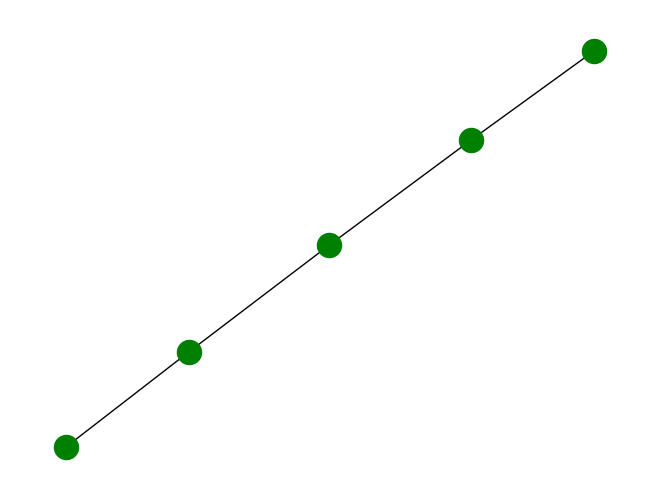

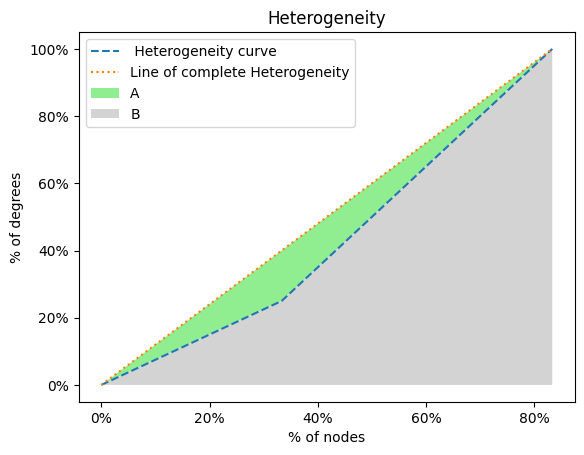

0.15


<ipython-input-9-b6b8aa8df184>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Path Graph','H': h}, ignore_index = True)


In [9]:
path_graph = nx.path_graph(5)
nx.draw(path_graph, node_color='green')
plt.show()
gc = Graph_comparator(path_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Path Graph','H': h}, ignore_index = True)

### Regular graph (Lattice) or K-nearest-neighbor

In [10]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

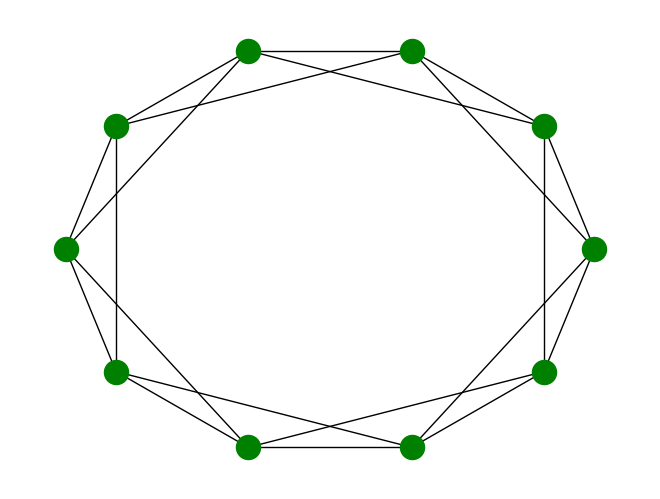

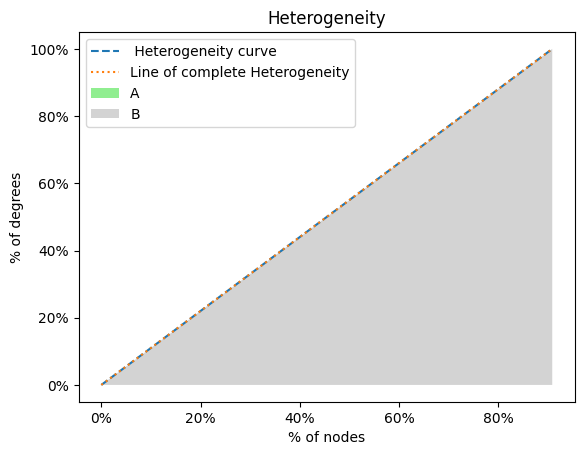

0.0


<ipython-input-11-d59896fb1c08>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'K-nearest-neighbor Graph','H': h}, ignore_index = True)


In [11]:
lattice = make_ring_lattice(10, 4)
nx.draw_circular(lattice, node_color='green')
plt.show()
gc = Graph_comparator(lattice)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'K-nearest-neighbor Graph','H': h}, ignore_index = True)

### Complete graph

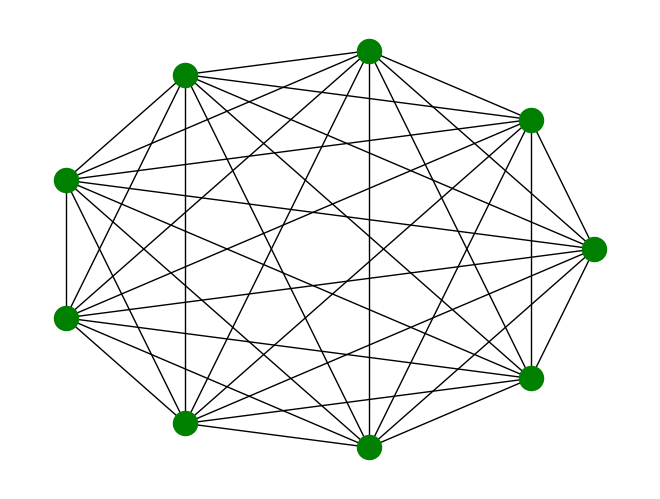

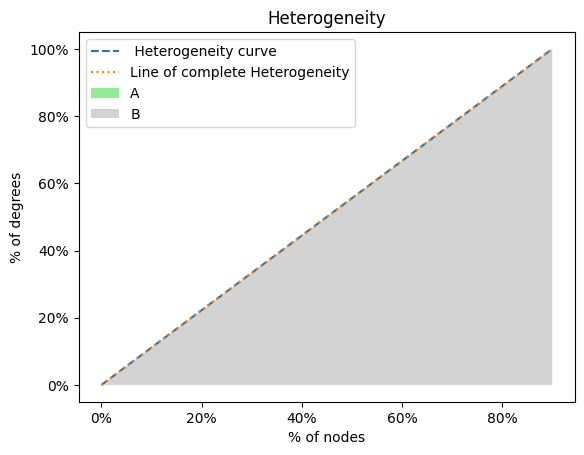

0.0


<ipython-input-12-d1324273f22b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Complete Graph','H': h}, ignore_index = True)


In [12]:
complete = nx.complete_graph(9)
nx.draw_circular(complete, node_color='green')
plt.show()
gc = Graph_comparator(complete)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Complete Graph','H': h}, ignore_index = True)

### Star graph

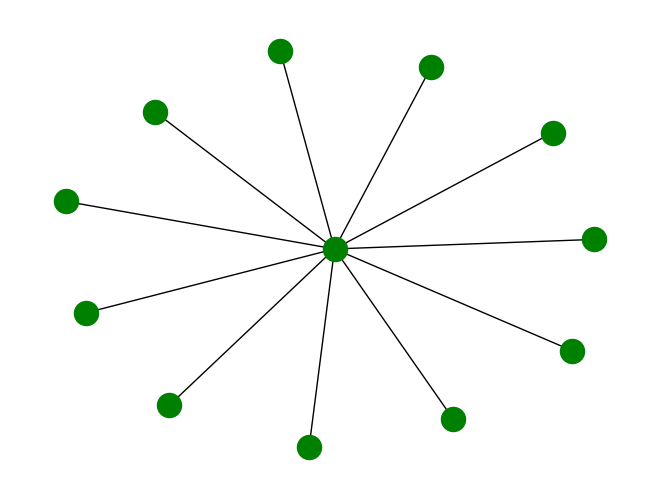

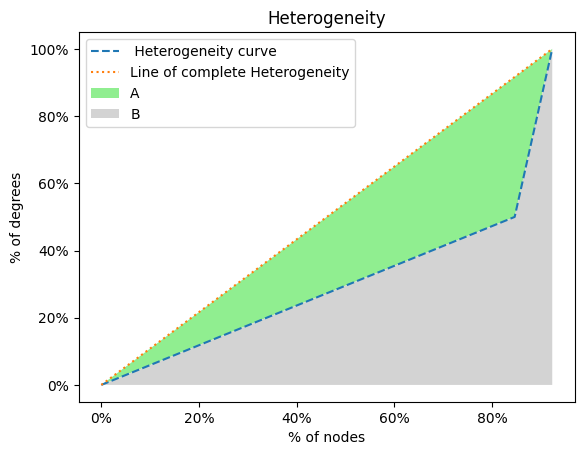

0.4166666666666667


<ipython-input-13-9991d84b8d2b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Star Graph','H': h}, ignore_index = True)


In [13]:
star_graph = nx.star_graph(11)
nx.draw(star_graph, node_color='green')
plt.show()
gc = Graph_comparator(star_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Star Graph','H': h}, ignore_index = True)

### connected star graph

In [14]:
def generate_connected_star_graph(hub, leaf):
  graph = nx.cycle_graph(hub)
  graph.add_nodes_from(list(range(hub, hub*leaf + hub)))
  for node in range(hub):
    for i in range(leaf):
      graph.add_edge(node, node*leaf + i + hub)
  return graph

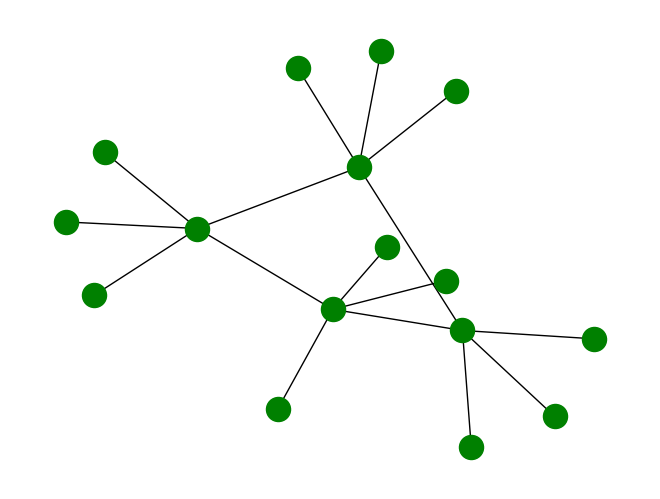

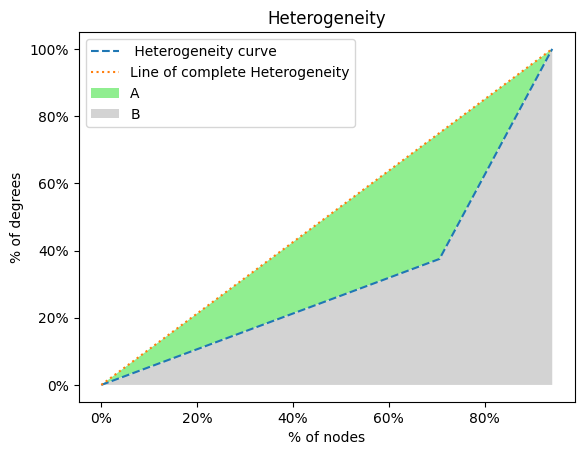

0.375


<ipython-input-15-c621c4b47394>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Connected Star Graph','H': h}, ignore_index = True)


In [15]:
connected_star_graph = generate_connected_star_graph(4, 3)
nx.draw(connected_star_graph, node_color='green')
plt.show()
gc = Graph_comparator(connected_star_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Connected Star Graph','H': h}, ignore_index = True)

### Rich-hub star graph

In [16]:
def generate_rich_hub_star_graph(hub, leaf):
  graph = nx.complete_graph(hub)
  graph.add_nodes_from(list(range(hub, hub*leaf + hub)))
  for node in range(hub):
    for i in range(leaf):
      graph.add_edge(node, node*leaf + i + hub)
  return graph

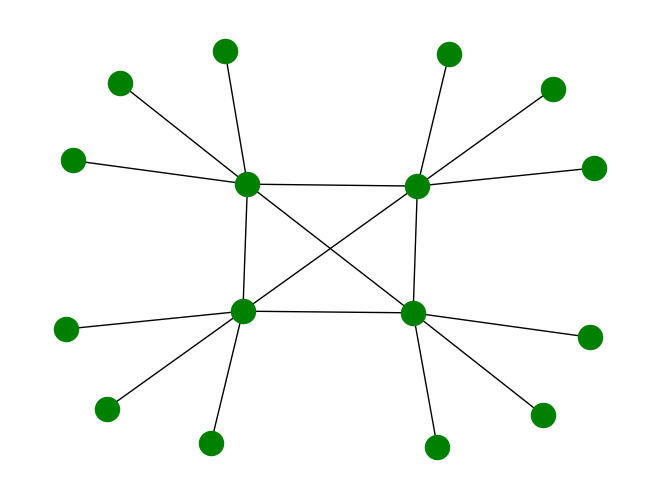

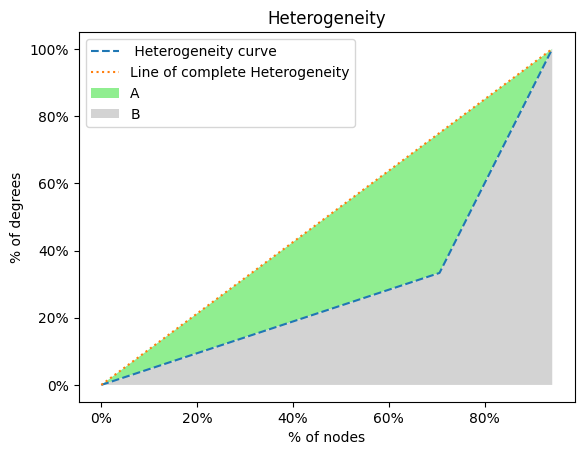

0.4166666666666667


<ipython-input-17-430c370b8757>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name':'Rich-Hub Star Graph','H': h}, ignore_index = True)


In [17]:
rich_hub_star_graph = generate_rich_hub_star_graph(4, 3)
nx.draw(rich_hub_star_graph, node_color='green')
plt.show()
gc = Graph_comparator(rich_hub_star_graph)
gc.plot_degrees()
h = gc.calculate_H()
print(h)
df = df.append({'graph-name':'Rich-Hub Star Graph','H': h}, ignore_index = True)

### comparison

In [18]:
df

,graph-name,H
0,Path Graph,0.150000
1,K-nearest-neighbor Graph,0.000000
2,Complete Graph,0.000000
3,Star Graph,0.416667
4,Connected Star Graph,0.375000
5,Rich-Hub Star Graph,0.416667


# 3 main graphs

In [19]:
df = pd.DataFrame(columns=['graph-name', 'size', 'H'])
nodes = [10, 25, 50, 75, 100, 500, 1000, 2000]

### erdos renyi graph

In [20]:
p = 0.35
for n in nodes:
  er = nx.erdos_renyi_graph(n, p)
  gc = Graph_comparator(er)
  h = gc.calculate_H()
  df = df.append({'graph-name': 'Erdos-Renyi Graph', 'size': n, 'H':h}, ignore_index=True)

df[df['graph-name'] == 'Erdos-Renyi Graph']

<ipython-input-20-d27845e83859>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Erdos-Renyi Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-20-d27845e83859>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Erdos-Renyi Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-20-d27845e83859>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Erdos-Renyi Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-20-d27845e83859>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Erdos-Renyi Graph', 's

,graph-name,size,H
0,Erdos-Renyi Graph,10,0.161111
1,Erdos-Renyi Graph,25,0.124906
2,Erdos-Renyi Graph,50,0.118598
3,Erdos-Renyi Graph,75,0.086335
4,Erdos-Renyi Graph,100,0.076593
5,Erdos-Renyi Graph,500,0.036992
6,Erdos-Renyi Graph,1000,0.024170
7,Erdos-Renyi Graph,2000,0.016845


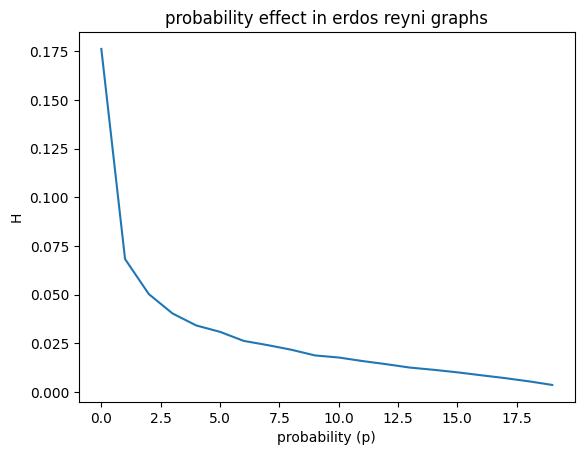

In [21]:
probs = np.arange (0.01, 1., 0.05)
er_size = 1000
h_list = []
for p in probs:
  er = nx.erdos_renyi_graph(er_size, p)
  h_list.append(calculate_H(er))
plt.plot(h_list)
plt.xlabel('probability (p)')
plt.ylabel('H')
plt.title('probability effect in erdos reyni graphs')
plt.show()

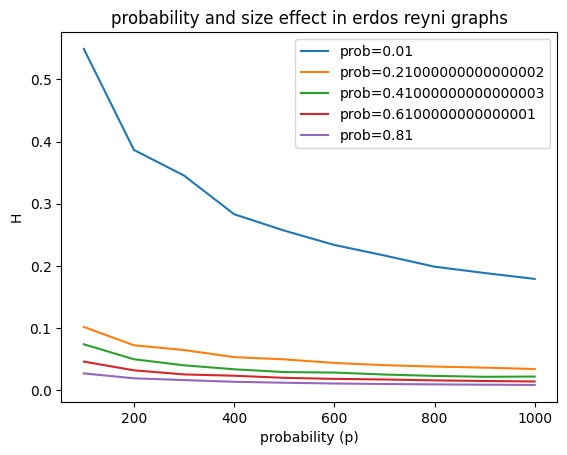

In [22]:
probs = np.arange (0.01, 1., 0.2)
er_size = np.arange(100, 1001, 100)

for p in probs:
  h_list = []
  for s in er_size:
    er = nx.erdos_renyi_graph(s, p)
    h_list.append(calculate_H(er))
  plt.plot(er_size, h_list, label=f'prob={p}')
plt.xlabel('probability (p)')
plt.ylabel('H')
plt.title('probability and size effect in erdos reyni graphs')
plt.legend(loc='best')
plt.show()

### small-world (watts strogatz)

In [23]:
k = 4
p = 0.25
for n in nodes:
  ws = nx.watts_strogatz_graph(n, k, p)
  gc = Graph_comparator(ws)
  h = gc.calculate_H()
  df = df.append({'graph-name': 'Small-World Graph', 'size': n, 'H':h}, ignore_index=True)

df[df['graph-name'] == 'Small-World Graph']

<ipython-input-23-11020490c301>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Small-World Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-23-11020490c301>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Small-World Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-23-11020490c301>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Small-World Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-23-11020490c301>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Small-World Graph', 's

,graph-name,size,H
8,Small-World Graph,10,0.115000
9,Small-World Graph,25,0.091200
10,Small-World Graph,50,0.091400
11,Small-World Graph,75,0.119644
12,Small-World Graph,100,0.111850
13,Small-World Graph,500,0.122666
14,Small-World Graph,1000,0.127352
15,Small-World Graph,2000,0.121584


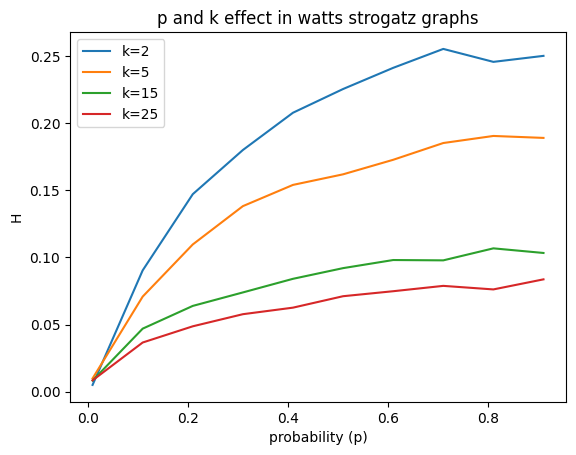

In [24]:
k_list = [2, 5, 15, 25]
probs = np.arange(0.01, 1.0, 0.1)
ws_size = 1000
for k in k_list:
  h_list = []
  for p in probs:
    ws = nx.watts_strogatz_graph(ws_size, k, p)
    h_list.append(calculate_H(ws))
  plt.plot(probs, h_list, label=f'k={k}')
plt.xlabel('probability (p)')
plt.ylabel('H')
plt.title('p and k effect in watts strogatz graphs')
plt.legend(loc='best')
plt.show()

### scale free (barabasi albert)

In [25]:
m = 3
for n in nodes:
  ba = nx.barabasi_albert_graph(n, m)
  gc = Graph_comparator(ba)
  h = gc.calculate_H()
  df = df.append({'graph-name': 'Barabasi-Albert Graph', 'size': n, 'H':h}, ignore_index=True)

df[df['graph-name'] == 'Barabasi-Albert Graph']

<ipython-input-25-ed36affe7fa5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Barabasi-Albert Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-25-ed36affe7fa5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Barabasi-Albert Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-25-ed36affe7fa5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Barabasi-Albert Graph', 'size': n, 'H':h}, ignore_index=True)
<ipython-input-25-ed36affe7fa5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'graph-name': 'Barabasi-A

,graph-name,size,H
16,Barabasi-Albert Graph,10,0.223810
17,Barabasi-Albert Graph,25,0.276364
18,Barabasi-Albert Graph,50,0.321560
19,Barabasi-Albert Graph,75,0.326667
20,Barabasi-Albert Graph,100,0.333540
21,Barabasi-Albert Graph,500,0.363952
22,Barabasi-Albert Graph,1000,0.371564
23,Barabasi-Albert Graph,2000,0.377428


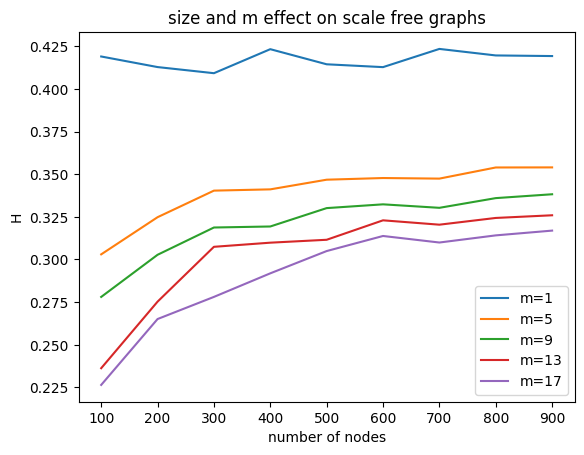

In [26]:
m_list = np.arange(1, 20, 4)
ba_size = np.arange(100, 1000, 100)
for m in m_list:
  h_list = []
  for n in ba_size:
    ba = nx.barabasi_albert_graph(n, m)
    h_list.append(calculate_H(ba))
  plt.plot(ba_size, h_list, label=f'm={m}')
plt.legend(loc='best')
plt.xlabel('number of nodes')
plt.ylabel('H')
plt.title('size and m effect on scale free graphs')
plt.show()

### general comparison

<Axes: xlabel='size', ylabel='H'>

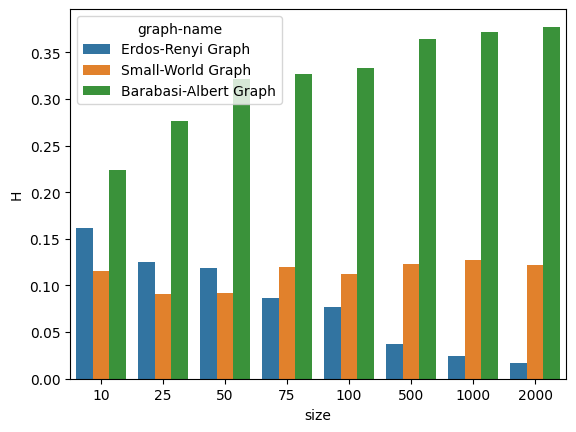

In [27]:
sns.barplot(x='size', y='H', hue='graph-name', data=df)

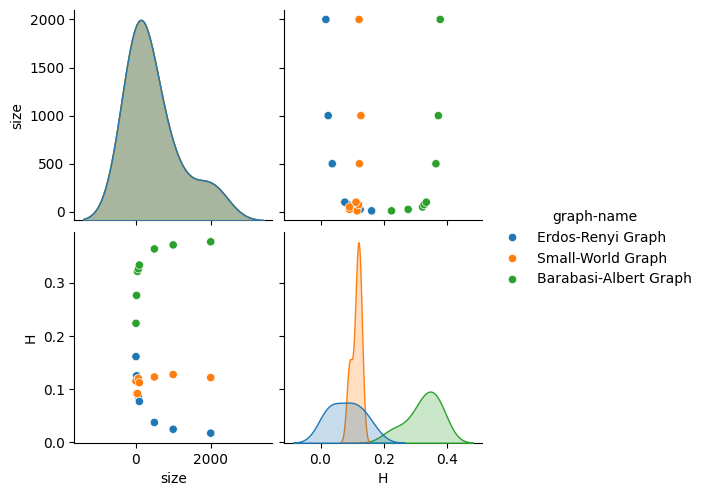

In [28]:
sns.pairplot(df, hue='graph-name')

# gamma effect

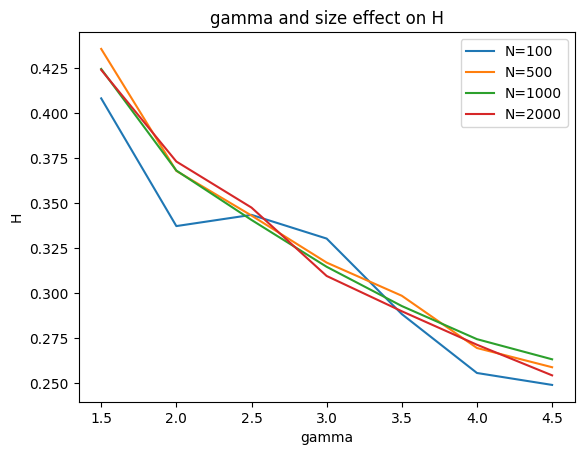

In [29]:
size_list = [100, 500, 1000, 2000]
gamma_list = np.arange(1.5, 5., 0.5)
for size in size_list:
  h_list = []
  for gamma in gamma_list:
    random_samples = st.gamma.rvs(gamma, size=size)
    h_list.append(calculate_H_for_distribution(random_samples))
  plt.plot(gamma_list, h_list, label=f'N={size}')
plt.xlabel('gamma')
plt.ylabel('H')
plt.title('gamma and size effect on H')
plt.legend(loc='best')
plt.show()